In [1]:
# import
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("2018_SEL_FILLED.csv") ## file reading

x = df.drop(['HE_DM'], axis=1)
y = df['HE_DM']

df

,sex,age,incm5,ho_incm5,edu,occp,wt_hs,wt_itvex,wt_vt,wt_nn,...,N_VA,N_VA_RAE,N_CAROT,N_RETIN,N_B1,N_B2,N_NIAC,N_VITC,HEI,HEI_BR
0,1,80,2,1,3,7,7129.611906,11065.346820,48804.430270,14516.423260,...,157.018937,115.820413,494.382289,74.621889,0.664332,0.509876,4.700086,5.846040,53.215661,10
1,1,78,5,5,4,1,7129.611906,3688.448941,19970.188140,14516.423260,...,274.952137,197.537509,928.975532,120.122882,1.175553,1.217959,16.821098,109.102194,83.316037,10
2,2,75,5,5,3,7,7129.611906,5244.077972,19970.188140,14516.423260,...,948.965037,601.616567,4168.181635,254.268098,0.638100,1.337223,4.785608,96.546711,78.771586,10
3,2,80,2,1,1,7,7129.611906,5244.077972,19970.188140,14516.423260,...,96.834167,48.430128,580.848469,0.026089,0.877007,0.305087,6.082442,10.749817,51.281633,10
4,2,71,2,1,4,7,7129.611906,3315.581424,19970.188140,14516.423260,...,407.860897,343.208811,775.825033,278.556725,0.646209,1.248963,6.526215,36.724796,76.575833,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4721,2,35,4,1,4,1,1351.114699,1424.263279,3348.046704,14516.423260,...,669.984560,431.314467,2864.041122,192.644374,1.086516,2.025690,14.034141,35.635696,83.315869,10
4722,2,66,5,1,2,6,1351.114699,819.485165,19970.188140,2047.985128,...,316.334027,185.138895,1574.341585,53.943763,0.510486,0.950224,7.626921,11.294342,68.153225,10
4723,2,73,2,4,1,7,1351.114699,2839.578073,8566.738012,1050.133699,...,180.549098,110.878102,836.051949,41.207106,0.755568,0.513739,6.631943,15.818002,65.795560,10
4724,1,43,4,4,4,1,1351.114699,3081.020375,19970.188140,14516.423260,...,716.591125,455.897373,3128.325027,195.203620,3.201068,3.552228,27.212885,131.545355,41.802411,6


In [3]:
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [4]:
# HE_DM 포함 총 144개 변수
# PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
result = pca.fit_transform(data_scaled)

print(sum(pca.explained_variance_ratio_))

0.17300593409301585


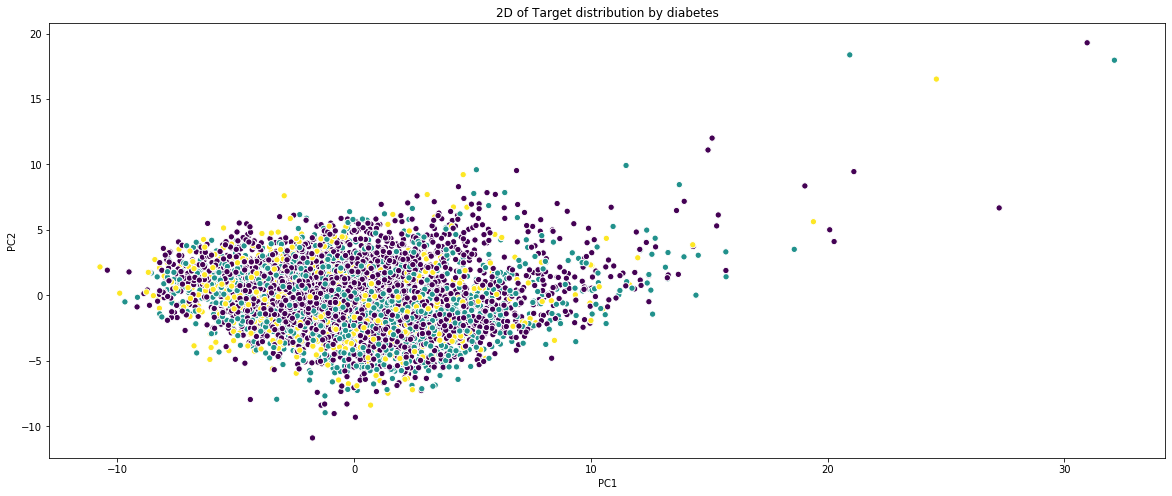

In [5]:
plt.figure(figsize=(20, 8))
plt.scatter(result[:,0], result[:,1], c=df['HE_DM'], s=40, edgecolors='white')
plt.title("2D of Target distribution by diabetes")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

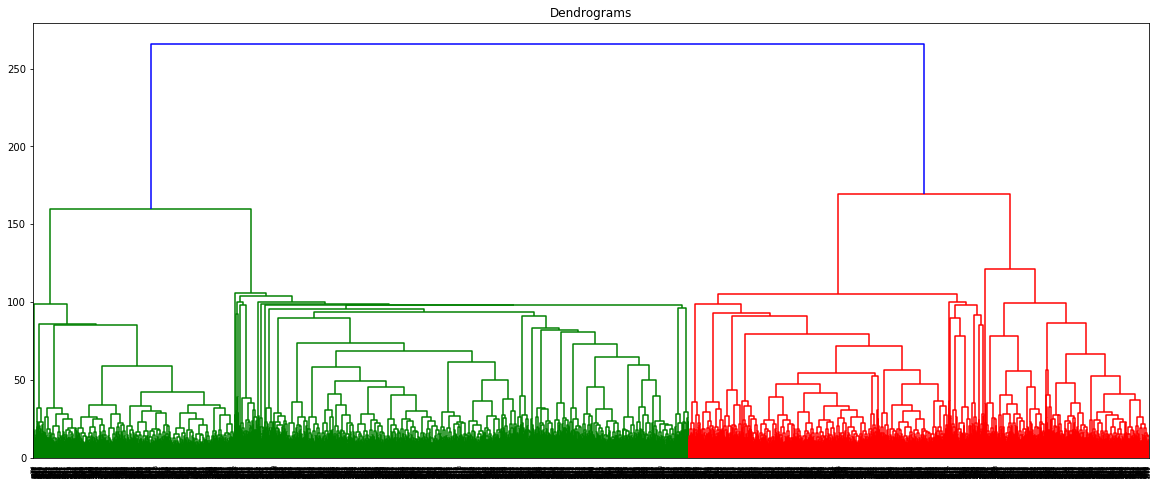

In [6]:
# HIERARCHICAL CLUSTERING 
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(20, 8))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

In [7]:
# FIRST PHASE TO DROP VARIABLES ###########################
# HE_DM 포함 95개 변수
first_df = df.drop(['HE_HbA1c', 'HE_Uglu', 'N_FAT', 'N_MUFA', 'N_PUFA', 'N_N6', 'N_VA', 'N_VA_RAE', 'N_CAROT', 'N_RETIN',
                    'DI4_pr','DM1_pr','DM1_pr','DM3_pr','DM4_pr','DJ2_pr','DJ4_pr','DC1_pr','DC2_pr','DC3_pr','DC3_pr','DC4_pr','DC5_pr','DC6_pr','DC4_pr',
                    'DF2_pr', 'DL1_pr', 'DJ0_pr', 'DJ6_pr', 'DH4_pr', 'DH3_pr', 'DH6_pr', 'DN1_pr', 'DK0_pr', 'DKNaN_pr', 'DK4_pr', 'LQ4_00', 'LQ1_sb', 'MH1_yr', 'MO1_wk',
                    'BD1','BS1_1','BS9_2','BE3_71','HE_mens','HE_prg','HE_DMfh1','HE_Usg','HE_Uglu','HE_Uket','HE_Ubld','HE_pef','HE_cough1'], axis = 1)
first_df

first_x = first_df.drop(['HE_DM'], axis=1)
first_y = df['HE_DM']

In [8]:
scaler = StandardScaler()
first_scaled = pd.DataFrame(scaler.fit_transform(first_x), columns=first_x.columns)

In [9]:
# PCA
pca = PCA(n_components=2)
first_result = pca.fit_transform(first_scaled)

print(sum(pca.explained_variance_ratio_))

0.21509744092524233


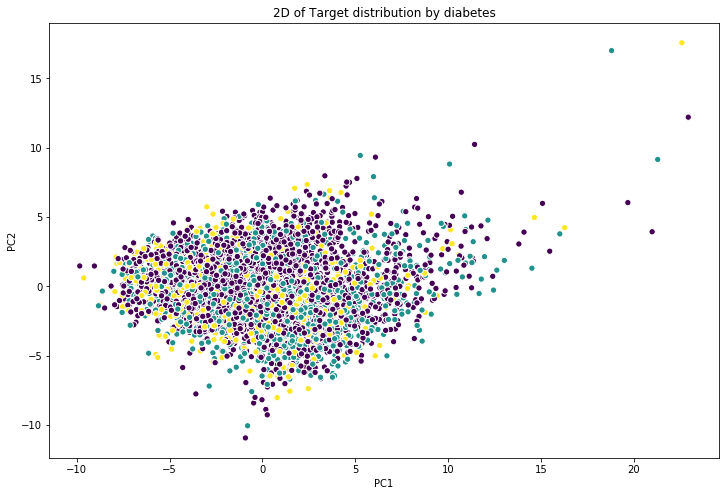

In [10]:
plt.figure(figsize=(12, 8))
plt.scatter(first_result[:,0], first_result[:,1], c=first_df['HE_DM'], s=40, edgecolors='white')
plt.title("2D of Target distribution by diabetes")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

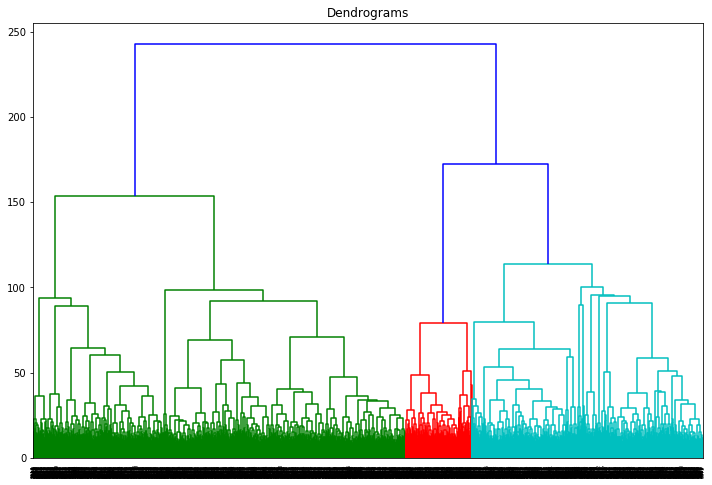

In [11]:
# HIERARCHICAL CLUSTERING 
plt.figure(figsize=(12, 8))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(first_scaled, method='ward'))

In [12]:
# SECOND PHASE TO DROP VARIABLES ###########################
# HE_DM 포함 총 70개 변수
second_df = first_df.drop(['HE_wt', 'HE_HB', 'N_EN', 'sex','allownc','house','marri_2','DI3_pr','DH2_pr','BHNaN_11','LQ_5EQL',
                          'EC1_1', 'BO1_1', 'MH1_1', 'MO1_1', 'BP1', 'BS3_1', 'BS13',
                          'HE_fh', 'HE_DMfh2','HE_Upro','HE_Ubil','HE_fvc','HEI_BR','HEI'], axis =1)

second_x = second_df.drop(['HE_DM'], axis=1)
second_y = df['HE_DM']

second_df

,age,incm5,ho_incm5,edu,occp,wt_hs,wt_itvex,wt_vt,wt_nn,wt_ntr,...,N_SUGAR,N_CA,N_PHOS,N_FE,N_NA,N_K,N_B1,N_B2,N_NIAC,N_VITC
0,80,2,1,3,7,7129.611906,11065.346820,48804.430270,14516.423260,12602.663140,...,14.110607,137.524220,467.694365,4.771832,1327.693537,944.539521,0.664332,0.509876,4.700086,5.846040
1,78,5,5,4,1,7129.611906,3688.448941,19970.188140,14516.423260,4200.887713,...,93.915511,430.240874,941.809087,11.041512,4961.541083,3658.637056,1.175553,1.217959,16.821098,109.102194
2,75,5,5,3,7,7129.611906,5244.077972,19970.188140,14516.423260,5622.287006,...,120.949600,342.242264,842.370409,7.348493,2087.228977,3072.114196,0.638100,1.337223,4.785608,96.546711
3,80,2,1,1,7,7129.611906,5244.077972,19970.188140,14516.423260,5622.287006,...,22.942586,146.555175,609.814863,5.071129,2886.722704,1244.294594,0.877007,0.305087,6.082442,10.749817
4,71,2,1,4,7,7129.611906,3315.581424,19970.188140,14516.423260,3268.787290,...,78.265128,587.222358,793.749899,4.773000,605.814716,2280.084010,0.646209,1.248963,6.526215,36.724796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4721,35,4,1,4,1,1351.114699,1424.263279,3348.046704,14516.423260,1403.756335,...,53.574344,750.121366,1394.802936,21.982038,5421.978395,2919.595466,1.086516,2.025690,14.034141,35.635696
4722,66,5,1,2,6,1351.114699,819.485165,19970.188140,2047.985128,954.816789,...,30.169426,347.660088,646.971024,11.162439,1911.238668,1519.392072,0.510486,0.950224,7.626921,11.294342
4723,73,2,4,1,7,1351.114699,2839.578073,8566.738012,1050.133699,3196.526870,...,22.276118,320.490990,562.630376,4.156207,1484.559757,1348.154162,0.755568,0.513739,6.631943,15.818002
4724,43,4,4,4,1,1351.114699,3081.020375,19970.188140,14516.423260,3135.442332,...,51.161971,505.309084,1645.622901,12.248035,5592.165116,3567.590282,3.201068,3.552228,27.212885,131.545355


In [13]:
scaler = StandardScaler()
second_scaled = pd.DataFrame(scaler.fit_transform(second_x), columns=second_x.columns)

In [14]:
# PCA
pca = PCA(n_components=2)
second_result = pca.fit_transform(second_scaled)

print(sum(pca.explained_variance_ratio_))

0.2421552541398444


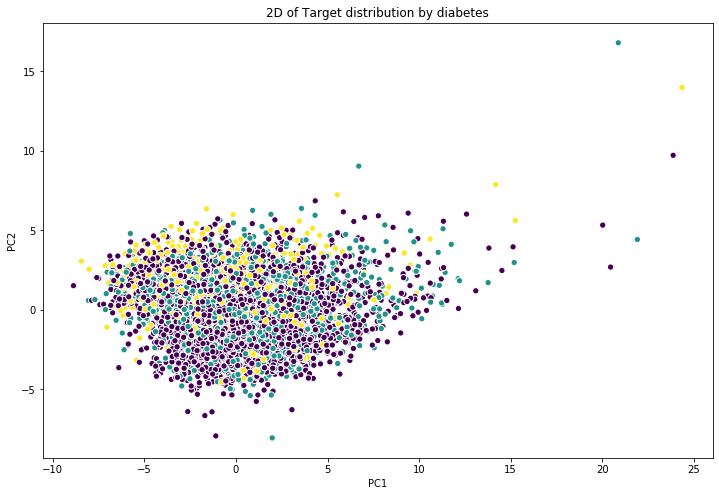

In [15]:
plt.figure(figsize=(12, 8))
plt.scatter(second_result[:,0], second_result[:,1], c=second_df['HE_DM'], s=40, edgecolors='white')
plt.title("2D of Target distribution by diabetes")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

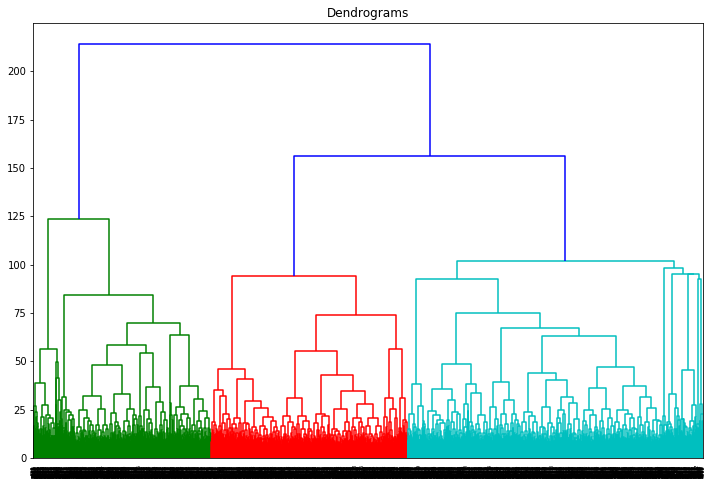

In [16]:
# HIERARCHICAL CLUSTERING 
plt.figure(figsize=(12, 8))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(second_scaled, method='ward'))

In [17]:
# THIRD PHASE TO DROP VARIABLES ###########################
# HE_DM 포함 총 52개 변수
third_df=second_df.drop(['incm5','ho_incm5','edu','occp','wt_vt','cfam','D_1_1','BO1','BD1_11','BS2_1','BE3_31','HE_obe','HE_crea','HE_Uph','HE_Unitr','HE_Ukal','HE_sput1','N_VITC'],axis=1)

third_x = third_df.drop(['HE_DM'], axis=1)
third_y = df['HE_DM']

third_df

,age,wt_hs,wt_itvex,wt_nn,wt_ntr,ainc,DI1_pr,DI2_pr,DM2_pr,DC7_pr,...,N_TDF,N_SUGAR,N_CA,N_PHOS,N_FE,N_NA,N_K,N_B1,N_B2,N_NIAC
0,80,7129.611906,11065.346820,14516.423260,12602.663140,80.000000,1,1,0,0,...,8.024705,14.110607,137.524220,467.694365,4.771832,1327.693537,944.539521,0.664332,0.509876,4.700086
1,78,7129.611906,3688.448941,14516.423260,4200.887713,1500.000000,0,0,0,0,...,39.887760,93.915511,430.240874,941.809087,11.041512,4961.541083,3658.637056,1.175553,1.217959,16.821098
2,75,7129.611906,5244.077972,14516.423260,5622.287006,1500.000000,1,0,1,0,...,44.459450,120.949600,342.242264,842.370409,7.348493,2087.228977,3072.114196,0.638100,1.337223,4.785608
3,80,7129.611906,5244.077972,14516.423260,5622.287006,75.666667,0,0,0,0,...,16.174439,22.942586,146.555175,609.814863,5.071129,2886.722704,1244.294594,0.877007,0.305087,6.082442
4,71,7129.611906,3315.581424,14516.423260,3268.787290,75.666667,1,0,0,0,...,20.316407,78.265128,587.222358,793.749899,4.773000,605.814716,2280.084010,0.646209,1.248963,6.526215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4721,35,1351.114699,1424.263279,14516.423260,1403.756335,677.500000,0,0,0,0,...,19.915406,53.574344,750.121366,1394.802936,21.982038,5421.978395,2919.595466,1.086516,2.025690,14.034141
4722,66,1351.114699,819.485165,2047.985128,954.816789,677.500000,0,1,1,0,...,16.788414,30.169426,347.660088,646.971024,11.162439,1911.238668,1519.392072,0.510486,0.950224,7.626921
4723,73,1351.114699,2839.578073,1050.133699,3196.526870,110.000000,1,0,0,0,...,9.615335,22.276118,320.490990,562.630376,4.156207,1484.559757,1348.154162,0.755568,0.513739,6.631943
4724,43,1351.114699,3081.020375,14516.423260,3135.442332,666.666667,1,0,0,0,...,23.865357,51.161971,505.309084,1645.622901,12.248035,5592.165116,3567.590282,3.201068,3.552228,27.212885


In [18]:
scaler = StandardScaler()
third_scaled = pd.DataFrame(scaler.fit_transform(third_x), columns=third_x.columns)

In [19]:
# PCA
pca = PCA(n_components=2)
third_result = pca.fit_transform(third_scaled)

print(sum(pca.explained_variance_ratio_))

0.29656235339288234


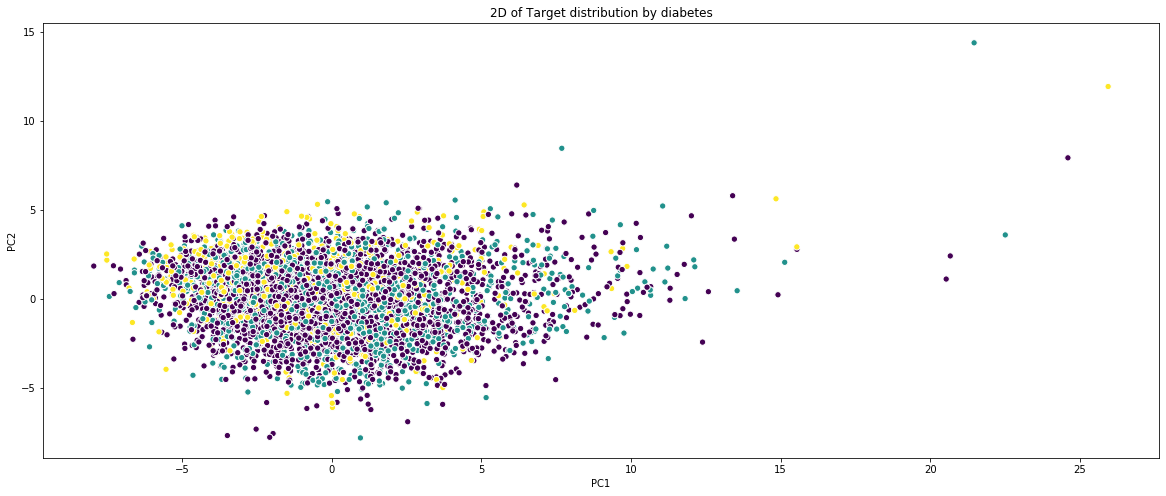

In [20]:
plt.figure(figsize=(20, 8))
plt.scatter(third_result[:,0], third_result[:,1], c=third_df['HE_DM'], s=40, edgecolors='white')
plt.title("2D of Target distribution by diabetes")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

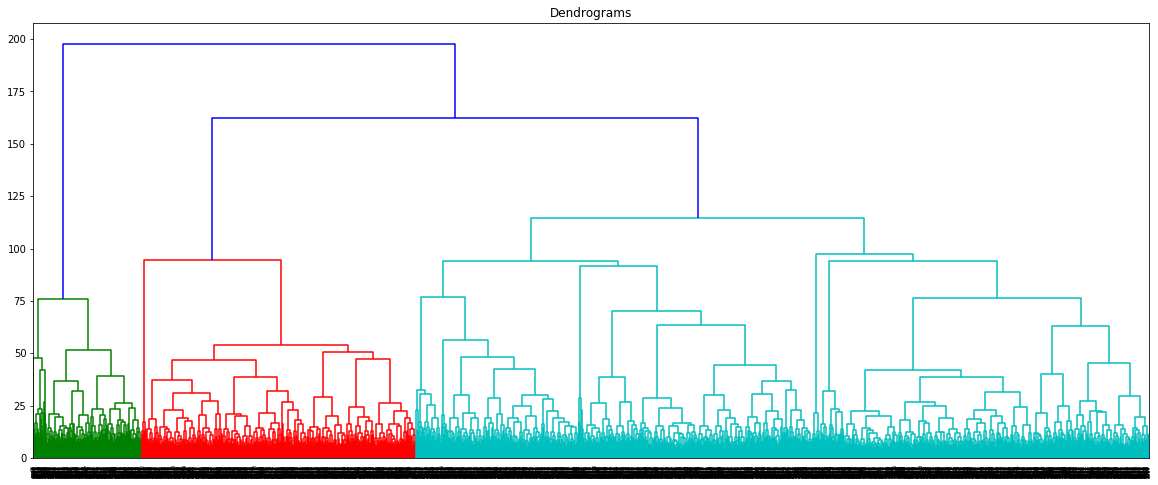

In [21]:
# HIERARCHICAL CLUSTERING 
plt.figure(figsize=(20, 8))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(third_scaled, method='ward'))

In [22]:
# FOURTH PHASE TO DROP VARIABLES ###########################
# HE_DM 포함 총 33개 변수
fourth_df=third_df.drop(['wt_hs','wt_nn','wt_ntr','educ','BD2','Total_slp_wk','Total_slp_wd','HE_HBsAg','HE_BUN','HE_Ucot','HE_UNa','GS_mea_l_1','N_WATER','N_CA','N_PHOS','N_NA','N_K','N_B2','N_NIAC'], axis=1)
fourth_x = fourth_df.drop(['HE_DM'], axis=1)
fourth_y = df['HE_DM']

fourth_df

,age,wt_itvex,ainc,DI1_pr,DI2_pr,DM2_pr,DC7_pr,HE_DMfh3,HE_ht,HE_wc,...,N_INTK,N_PROT,N_SFA,N_N3,N_CHOL,N_CHO,N_TDF,N_SUGAR,N_FE,N_B1
0,80,11065.346820,80.000000,1,1,0,0,0,162.4,82.2,...,584.617278,36.421414,6.574070,0.573964,104.511252,97.066580,8.024705,14.110607,4.771832,0.664332
1,78,3688.448941,1500.000000,0,0,0,0,0,167.7,98.3,...,1573.428467,93.260455,7.572577,0.333173,206.181421,298.257700,39.887760,93.915511,11.041512,1.175553
2,75,5244.077972,1500.000000,1,0,1,0,1,157.7,80.7,...,1194.733365,42.516444,23.130683,2.193219,495.097017,320.072436,44.459450,120.949600,7.348493,0.638100
3,80,5244.077972,75.666667,0,0,0,0,0,146.1,93.0,...,526.064249,24.806971,2.329953,0.356655,3.729000,211.241049,16.174439,22.942586,5.071129,0.877007
4,71,3315.581424,75.666667,1,0,0,0,1,157.2,78.4,...,1271.085794,35.319840,16.748430,0.312280,65.398719,221.474668,20.316407,78.265128,4.773000,0.646209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4721,35,1424.263279,677.500000,0,0,0,0,0,159.8,70.1,...,1781.776105,92.198711,15.402060,2.212394,386.908388,326.026870,19.915406,53.574344,21.982038,1.086516
4722,66,819.485165,677.500000,0,1,1,0,1,156.9,87.3,...,784.704360,43.559925,3.762740,2.154886,191.766307,135.983452,16.788414,30.169426,11.162439,0.510486
4723,73,2839.578073,110.000000,1,0,0,0,0,145.2,77.2,...,594.855294,28.280810,7.598784,0.370567,36.296231,146.494724,9.615335,22.276118,4.156207,0.755568
4724,43,3081.020375,666.666667,1,0,0,0,0,176.8,99.2,...,1941.664158,123.816307,64.379806,3.134839,533.339166,168.269738,23.865357,51.161971,12.248035,3.201068


In [23]:
scaler = StandardScaler()
fourth_scaled = pd.DataFrame(scaler.fit_transform(fourth_x), columns=fourth_x.columns)

In [24]:
# PCA
pca = PCA(n_components=2)
fourth_result = pca.fit_transform(fourth_scaled)

print(sum(pca.explained_variance_ratio_))
fourth_df['HE_DM']

0.28678533454290284


0       2
1       3
2       3
3       3
4       3
       ..
4721    1
4722    1
4723    1
4724    2
4725    1
Name: HE_DM, Length: 4726, dtype: int64

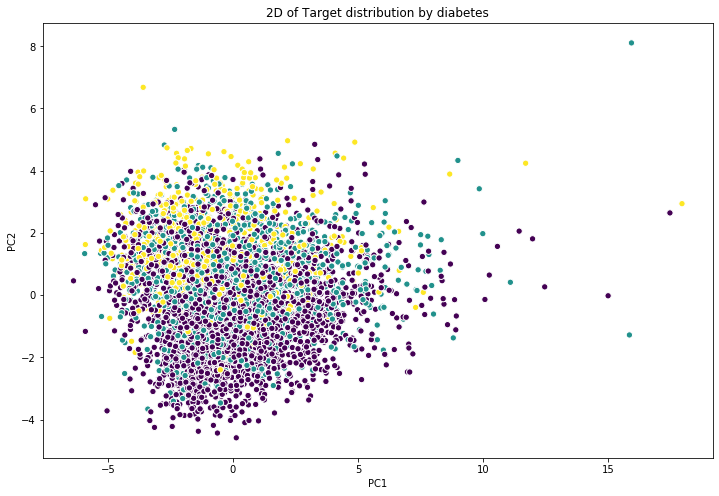

In [25]:
plt.figure(figsize=(12, 8))
plt.scatter(fourth_result[:,0], fourth_result[:,1], c=third_df['HE_DM'], s=40, edgecolors='white')
plt.title("2D of Target distribution by diabetes")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

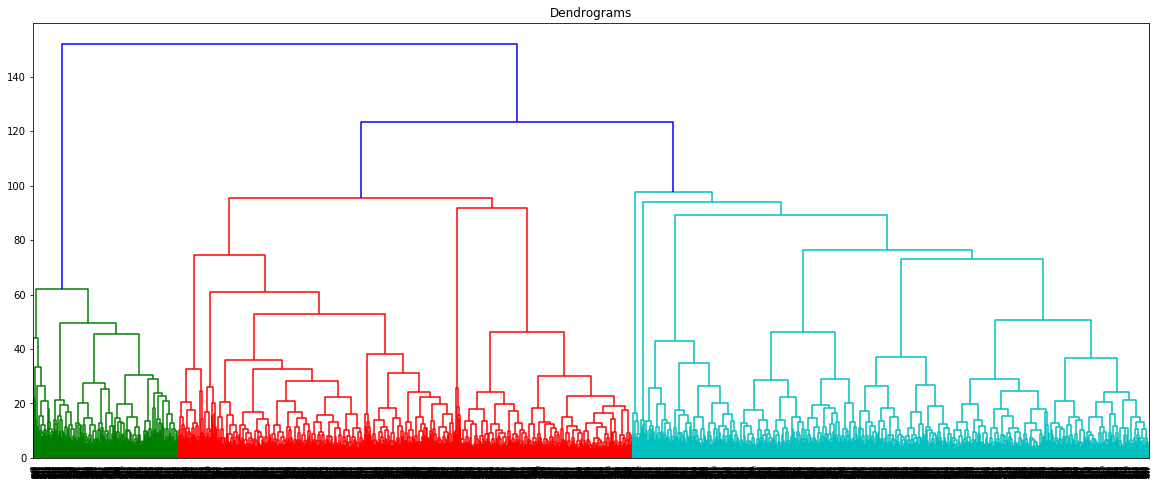

In [26]:
# HIERARCHICAL CLUSTERING 
plt.figure(figsize=(20, 8))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(fourth_scaled, method='ward'))